In [1]:
require "torch"
require "itorch"
require "cutorch"
require "nn"
require "cunn"
require "cudnn"
data = require "data"
helpers = require "helpers"

-- Load configuration
args = {conf = 'conf.json'}
opts = helpers.opts(args)

-- Initialize and normalize training and validation data
trainData = data.new(opts.train,
    opts.height, opts.width, opts.validationSubjects)
trainData:normalize(opts.mean, opts.std)
validateData = data.new(opts.validate,
    opts.height, opts.width, opts.validationSubjects, true)
validateData:normalize(opts.mean, opts.std)

Images	Height	Width	


4556	200	280	


Images	Height	Width	
1079	200	280	


In [7]:
-- Load network from file
model = 'out/2016-08-03-spatial/model_12000.t7'
net = torch.load(model)
modelName = string.match(model, '(.*)%.t7$')


32_1	0	


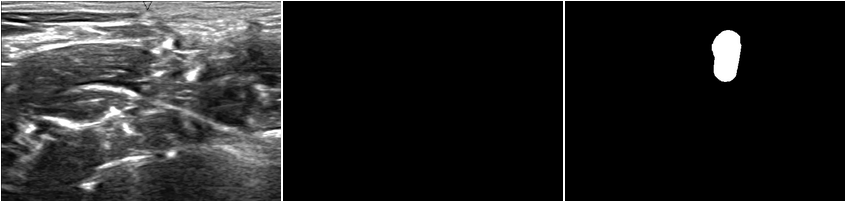

34_85	0.82073568251155	


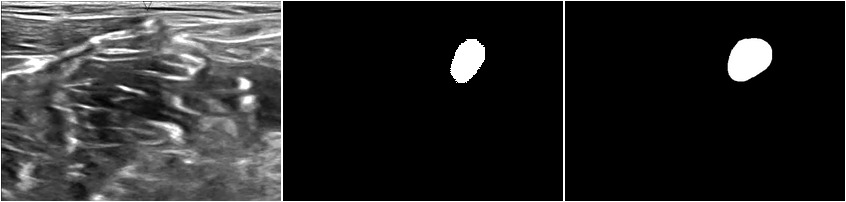

21_89	1	


1_61	0.83821525493743	


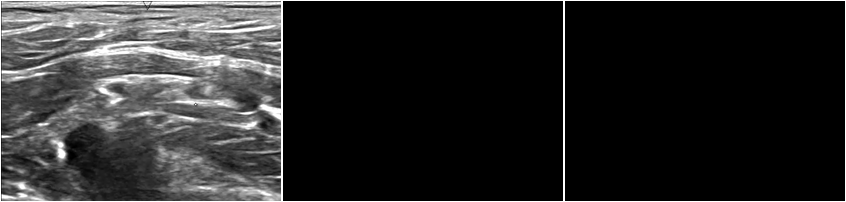

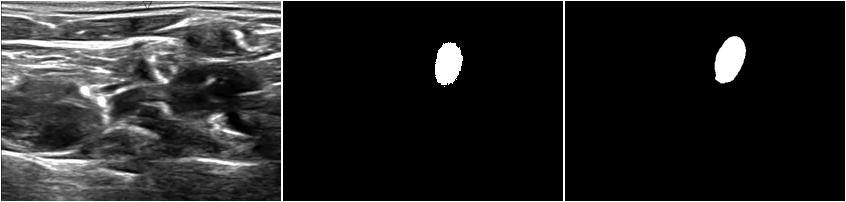

5_114	0.44978555355621	


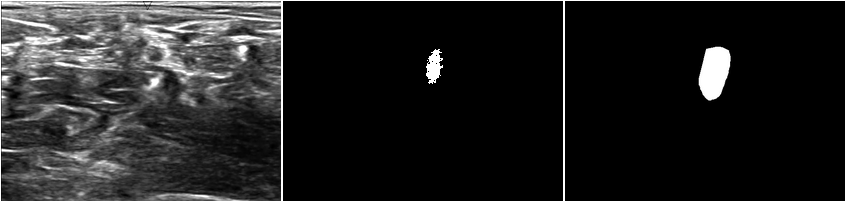

17_27	0.7841864591616	


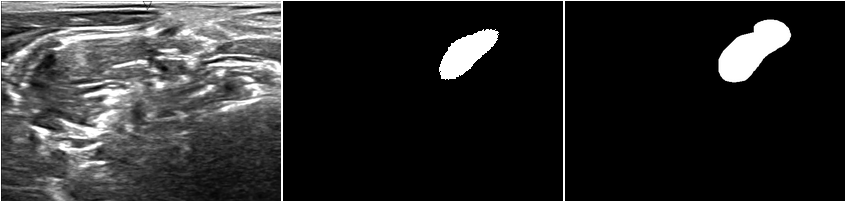

5_97	1	


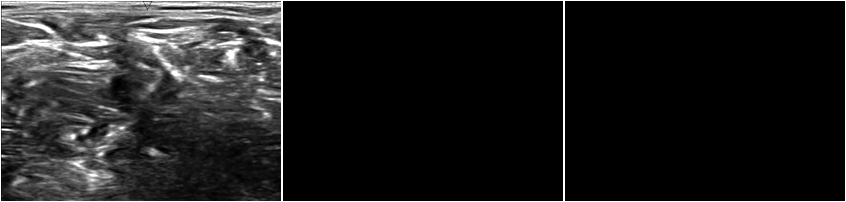

23_49	0.77743946595012	


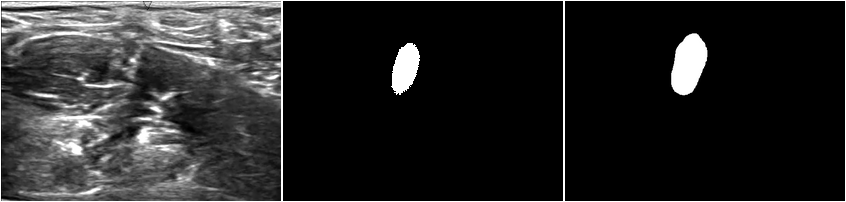


Mean Dice score for batch:	0.70879530201461	


In [11]:
-- Get a minibatch
local batch, names = trainData:batch(opts.batchSize)
local batchInputs = batch.inputs:cuda()
local batchLabels = batch.labels:cuda()

-- Forward pass and score
local outputs = net:forward(batchInputs)
local diceValue = helpers.dice(outputs, batchLabels)
local _, predLabels = outputs:max(2)
predLabels = predLabels:squeeze():double() - 1

-- Output
for j, name in pairs(names) do
    print(name, diceValue[j])
    itorch.image({batchInputs[j]*opts.std + opts.mean, predLabels[j], batchLabels[j] - 1})
end
print()
print("Mean Dice score for batch:", diceValue:mean())

42_49	0.67688010255066	


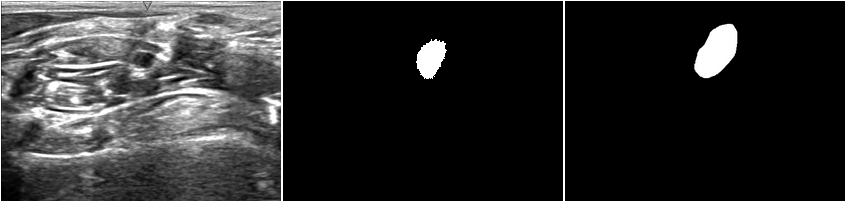

44_112	0.89185079727668	


44_80	1	


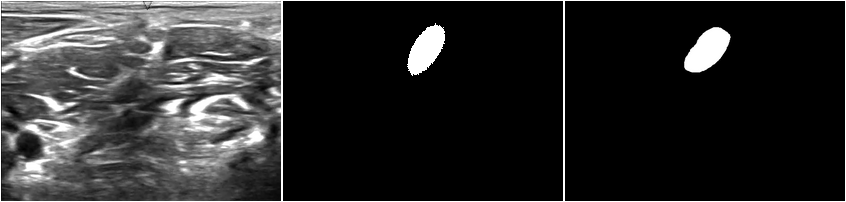

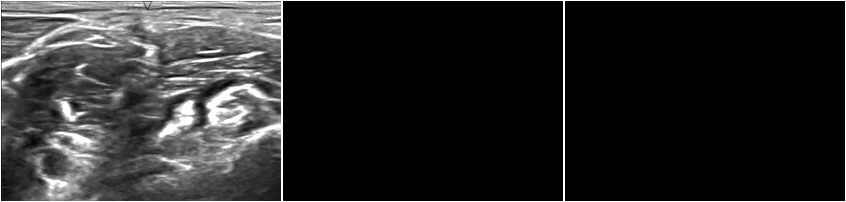

44_31	0	


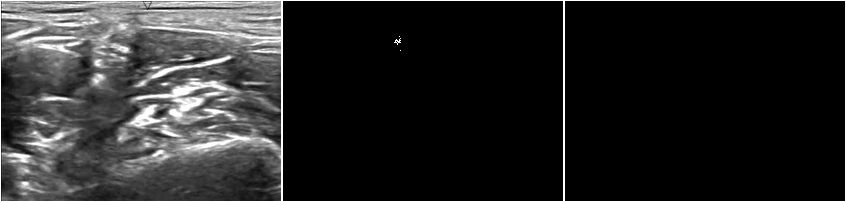

46_106	1	


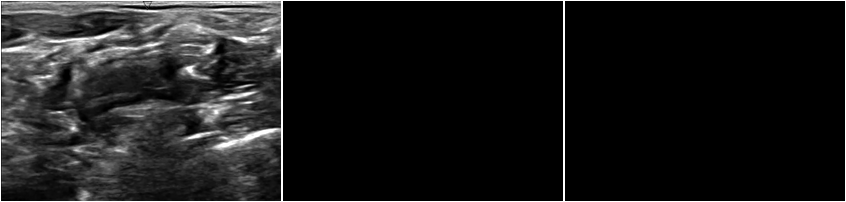

42_71	0.86902610244301	


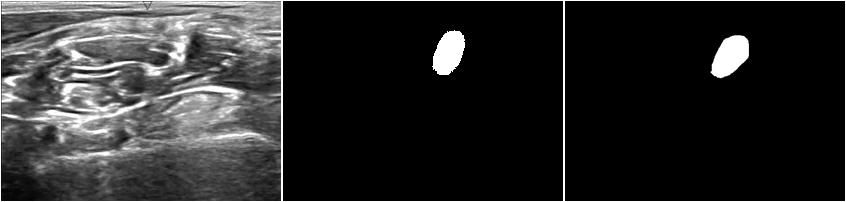

46_26	1	


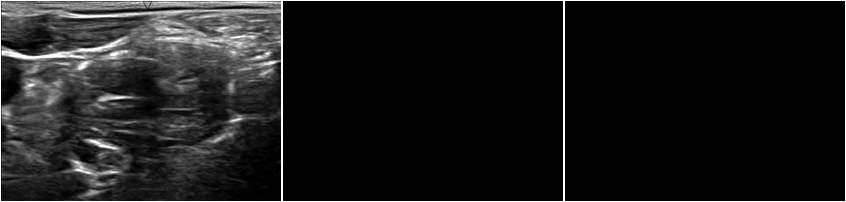

39_115	1	


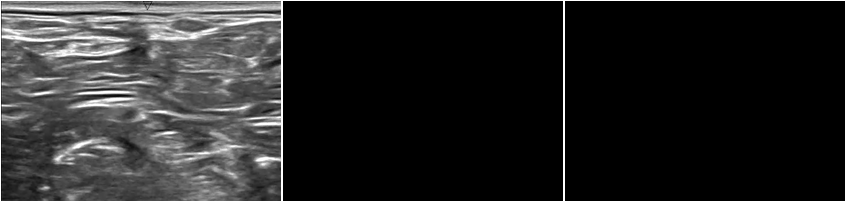


Mean Dice score for batch:	0.80471962528379	


In [14]:
-- Get a minibatch
local batch, names = validateData:batch(opts.batchSize)
local batchInputs = batch.inputs:cuda()
local batchLabels = batch.labels:cuda()

-- Forward pass and score
local outputs = net:forward(batchInputs)
local diceValue = helpers.dice(outputs, batchLabels)
local _, predLabels = outputs:max(2)
predLabels = predLabels:squeeze():double() - 1

-- Output
for j, name in pairs(names) do
    print(name, diceValue[j])
    itorch.image({batchInputs[j]*opts.std + opts.mean, predLabels[j], batchLabels[j] - 1})
end
print()
print("Mean Dice score for batch:", diceValue:mean())